In [32]:
import numpy
import matplotlib.pyplot as plt

#RL armature model, 1st order
#1, u(t) = Ldi(t)/dt + Ri(t)
#2, U(s) = LI(s)s    + RI(s)
#3, G(s) = k/(1 + tau*s)
#4, dcurrent = u/L - (R/L)*current

L = 1.5*0.001  #1.5mH
R = 8.0        #8.0ohm

vcc = 10.0      #10V

#G(s) = k/(1 + tau*s)
k   = 1.0/R
tau = L/R

#desired time constant, e.g. 1/2 of plant dynamics
tau_r = 0.5*tau

#compute PI controller
kp = tau/(k*tau_r)
ki = 1.0/(k*tau_r)

print("kp = ", kp)
print("ki = ", ki)

kp =  16.0
ki =  85333.33333333333


<Figure size 640x480 with 0 Axes>

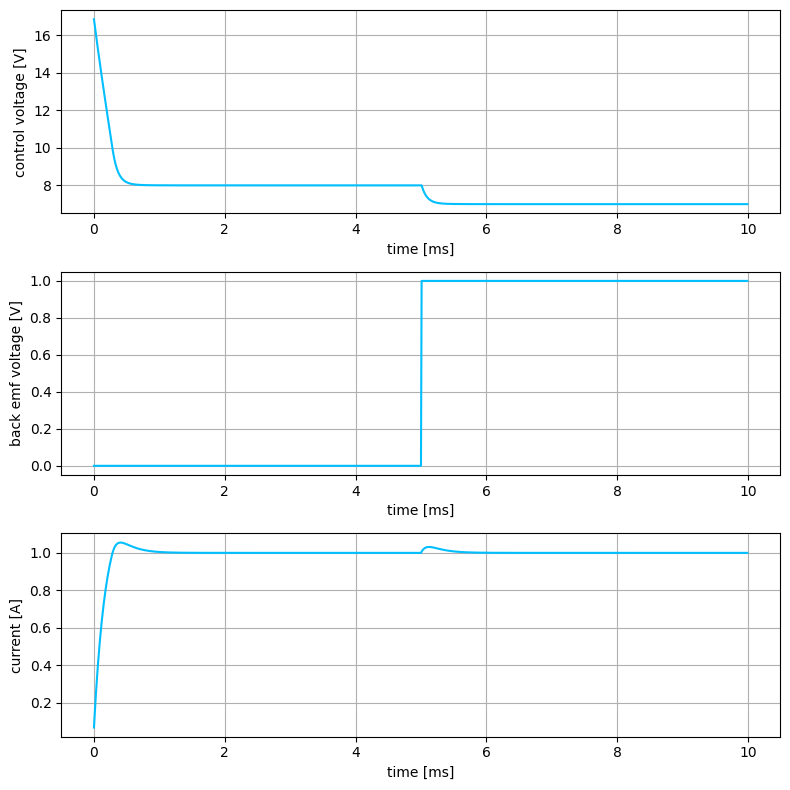

In [33]:
dt      = 0.00001
steps   = 1000

current_req = 1.0
current     = 0.0


error_sum = 0.0

t_result        = []
u_result        = []
bemf_result     = []
current_result  = []


for i in range(steps):

    #PI controller
    error     = current_req - current
    error_sum+= error*dt

    u = kp*error + ki*error_sum

    if i > steps//2:
        bemf = 1.0
    else:
        bemf = 0.0

   
    #add disturbance
    u_out    = u + bemf

    u_out    = numpy.clip(u_out, -vcc, vcc)

    #plant step
    dc       = u_out/L - (R/L)*current
    current  = current + dc*dt


    t_result.append(i*dt)
    u_result.append(u)
    bemf_result.append(bemf)
    current_result.append(current)


t_result = numpy.array(t_result)*1000.0

plt.clf()
fig, axs = plt.subplots(3, 1, figsize=(8, 8))


axs[0].plot(t_result, u_result, label="control", color="deepskyblue")
axs[0].set_xlabel("time [ms]")
axs[0].set_ylabel("control voltage [V]")
axs[0].grid()

axs[1].plot(t_result, bemf_result, label="back emf", color="deepskyblue")
axs[1].set_xlabel("time [ms]")
axs[1].set_ylabel("back emf voltage [V]")
axs[1].grid()

axs[2].plot(t_result, current_result, label="current", color="deepskyblue")
axs[2].set_xlabel("time [ms]")
axs[2].set_ylabel("current [A]")
axs[2].grid()


plt.tight_layout()
plt.show()
#plt.savefig("pi_output.png", dpi = 300)